# Argentinian Grape Production (2012 to 2017)

by [JuanBoho](https://github.com/JuanBoho)

Data:
    Main dataset [here](https://datos.agroindustria.gob.ar/dataset/produccion-uvas-argentina) and also a related one
    [here](https://www.economia.gob.ar/catalogo-sspmi/nuevo_dataset/vitivinicultura.csv).

TODO:   
    - [Production Heatmap](#production-heatmap)  
    - Production in % : by province, by depto, variations through years ...  
    - Exploratory analysis in secundary dataset, insights,  populate main dataset  
    - Look for related data : international grape prices, social, economics...  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ar_grape_production_2012_2017.csv')
df

,pais_id,pais_productor,provincia_id,provincia_productora,departamento_id,departamento_productor,localidad_productora,año_cosecha,quintales_producidos
0,32,Argentina,6,Buenos Aires,203,Coronel Suarez,Villa Arcadia,2012,765.10
1,32,Argentina,6,Buenos Aires,357,General Pueyrredon,Chapadmalal,2012,670.84
2,32,Argentina,6,Buenos Aires,819,Tornquist,Saldungaray,2012,244.31
3,32,Argentina,6,Buenos Aires,819,Tornquist,Villa Ventana,2012,40.95
4,32,Argentina,6,Buenos Aires,875,Villarino,Medanos,2012,392.85
...,...,...,...,...,...,...,...,...,...
3219,32,Argentina,90,Tucuman,98,Tafi Del Valle,Tafi Del Valle,2017,1969.84
3220,32,Argentina,90,Tucuman,98,Tafi Del Valle,Tafi Del Valle,2017,121.69
3221,32,Argentina,90,Tucuman,98,Tafi Del Valle,Tafi Del Valle,2017,22.19
3222,32,Argentina,90,Tucuman,98,Tafi Del Valle,Tafi Del Valle,2017,594.27


In [4]:
df.describe()

,pais_id,provincia_id,departamento_id,año_cosecha,quintales_producidos
count,3224.0,3224.000000,3224.000000,3224.000000,3.224000e+03
mean,32.0,51.776675,165.208437,2014.498449,4.308397e+04
std,0.0,16.532851,198.084256,1.706696,9.059038e+04
min,32.0,6.000000,7.000000,2012.000000,9.900000e-01
25%,32.0,50.000000,49.000000,2013.000000,8.997000e+02
50%,32.0,50.000000,98.000000,2015.000000,6.574485e+03
75%,32.0,66.000000,147.000000,2016.000000,4.143886e+04
max,32.0,90.000000,875.000000,2017.000000,1.106235e+06


In [5]:
# Checkig for na values count in each column
for i in list(df.columns):
    print(pd.isna(df[i]).value_counts(), end=" ")

False    3224
Name: pais_id, dtype: int64 False    3224
Name: pais_productor, dtype: int64 False    3224
Name: provincia_id, dtype: int64 False    3224
Name: provincia_productora, dtype: int64 False    3224
Name: departamento_id, dtype: int64 False    3224
Name: departamento_productor, dtype: int64 False    3224
Name: localidad_productora, dtype: int64 False    3224
Name: año_cosecha, dtype: int64 False    3224
Name: quintales_producidos, dtype: int64 

In [6]:
df.rename(columns = {'año_cosecha':'anio'}, inplace = True)
df

,pais_id,pais_productor,provincia_id,provincia_productora,departamento_id,departamento_productor,localidad_productora,anio,quintales_producidos
0,32,Argentina,6,Buenos Aires,203,Coronel Suarez,Villa Arcadia,2012,765.10
1,32,Argentina,6,Buenos Aires,357,General Pueyrredon,Chapadmalal,2012,670.84
2,32,Argentina,6,Buenos Aires,819,Tornquist,Saldungaray,2012,244.31
3,32,Argentina,6,Buenos Aires,819,Tornquist,Villa Ventana,2012,40.95
4,32,Argentina,6,Buenos Aires,875,Villarino,Medanos,2012,392.85
...,...,...,...,...,...,...,...,...,...
3219,32,Argentina,90,Tucuman,98,Tafi Del Valle,Tafi Del Valle,2017,1969.84
3220,32,Argentina,90,Tucuman,98,Tafi Del Valle,Tafi Del Valle,2017,121.69
3221,32,Argentina,90,Tucuman,98,Tafi Del Valle,Tafi Del Valle,2017,22.19
3222,32,Argentina,90,Tucuman,98,Tafi Del Valle,Tafi Del Valle,2017,594.27


<AxesSubplot:title={'center':'Total Grape Production 2012-2017'}, xlabel='Año', ylabel='Quintals'>

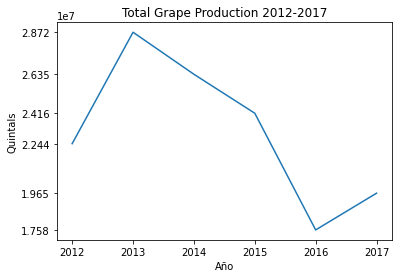

In [7]:
total_grape = df['quintales_producidos'].groupby(df['anio']).sum()
total_grape.plot(yticks = total_grape,
                 ylabel="Quintals", xlabel="Año",
                 title="Total Grape Production 2012-2017")

In [8]:
# Total grape production ( in quintals) each year by Province
total_prod_province_year = df['quintales_producidos'].groupby([df['provincia_productora'], df['anio']]).sum()
total_prod_province_year = total_prod_province_year.to_frame() # series to df
total_prod_province_year

quintales_producidos
provincia_productora anio                      
Buenos Aires         2012               2114.05
                     2013               2455.70
                     2014               3849.60
                     2015                854.87
                     2016               1303.14
...                                         ...
Tucuman              2013               2990.20
                     2014               2446.22
                     2015               3458.92
                     2016                889.04
                     2017               2911.83

[91 rows x 1 columns]

In [10]:
from matplotlib.ticker import FuncFormatter

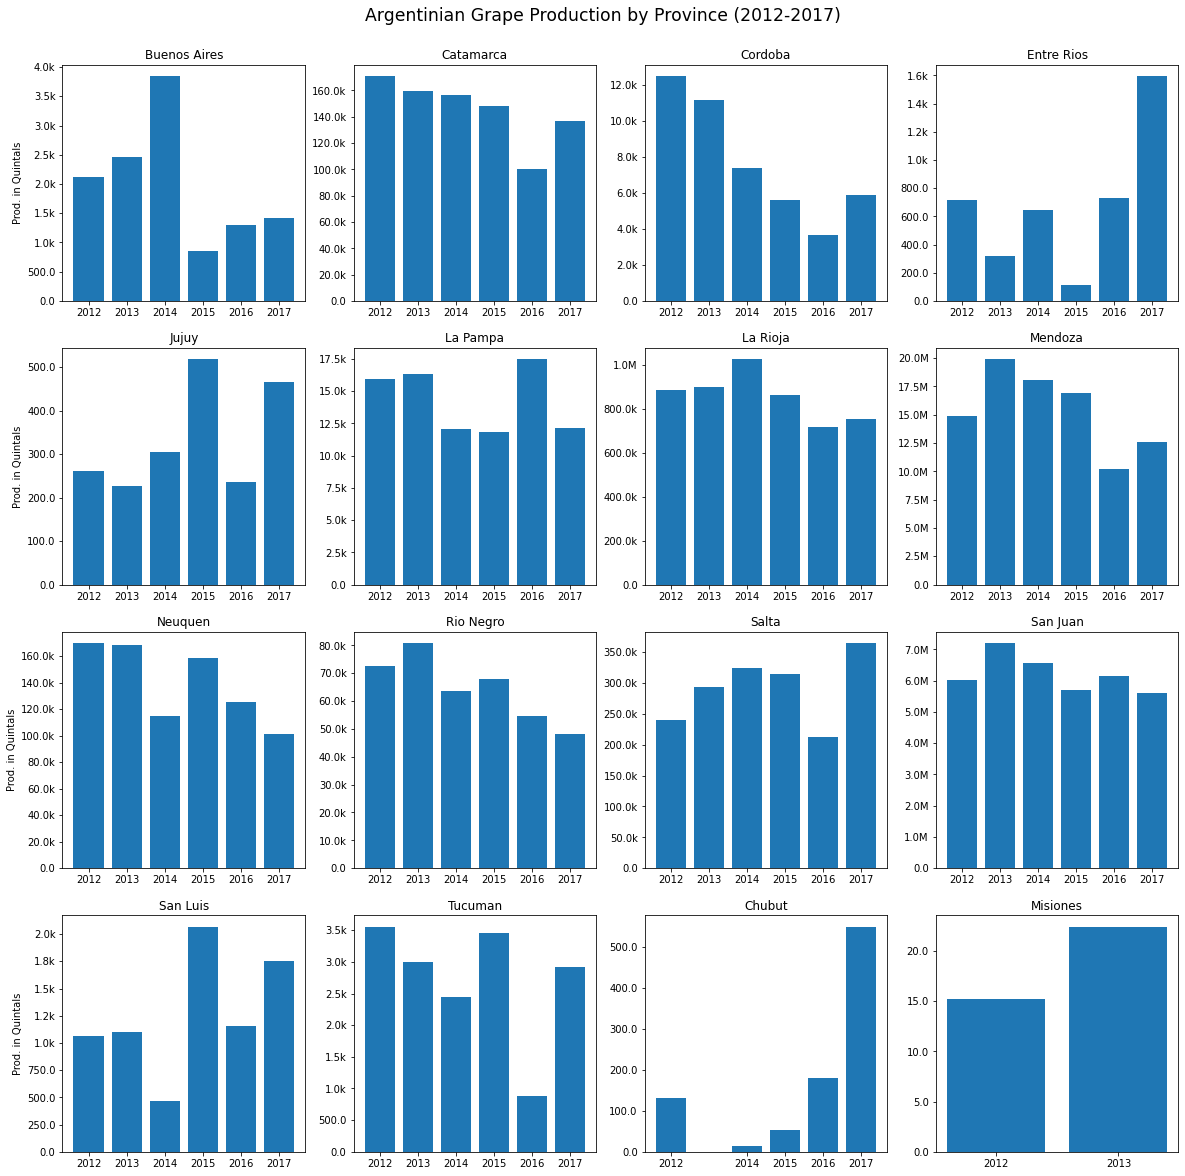

In [11]:
# To make friendlier plot
def number_format(value, pos):
    """ Returns a formatted value. Rounded to 2 decimal places + label: M (millions) or k (thousands)
        args are the value and tick position"""
    vlen = len(str(round(value)))
    if vlen >= 7:
        return '%1.1fM' % (value*1e-6)
    elif 7 > vlen >= 4:
        return '%1.1fk' % (value*1e-3)
    else: return '%1.1f' % (value)
    
formatter = FuncFormatter(number_format)

# Provinces ix (list of names) 
prov_names = total_prod_province_year.value_counts(subset='provincia_productora').keys().tolist()

# Just a shortcut to production data
prod_quintals = total_prod_province_year['quintales_producidos']
    
# Plot
fig, axs = plt.subplots(4, 4, figsize=(20, 20), sharey=False)

# loop through each Province then plot

prov_ix = 0

for ax_row in range(4):
    axs[ax_row][0].set_ylabel('Prod. in Quintals')
    for ax_col in range(4):
        
        # Loop through each Province production data (#TODO improve effic and legibility!)
        X = prod_quintals[prov_names[prov_ix]].keys().tolist()
        Y = prod_quintals[prov_names[prov_ix]].values.tolist() # Amount in Quintals
        
        axs[ax_row][ax_col].bar(X, Y)
        axs[ax_row][ax_col].yaxis.set_major_formatter(formatter)
        axs[ax_row][ax_col].set_title(prov_names[prov_ix])
        axs[ax_row][ax_col].set_xticks([i for i in X]) # Few provinces with missing data in some years
        
        
        prov_ix += 1

fig.suptitle('Argentinian Grape Production by Province (2012-2017)', y=0.92, fontsize='xx-large')
plt.show()  

## Production HeatMap

TODO: Review geodata, args to func, etc...

In [ ]:
import plotly.express as px
import json

file_deptos = open('ar_deptos.json', encoding='UTF-8')
departamentos = json.load(file_deptos)

#deptos_top = departamentos['']

cols = ['departamento_id','quintales_producidos']
deptos_df = df[cols].groupby(['departamento_id']).sum()
deptos_df.reset_index(inplace=True)

fig = px.choropleth_mapbox(deptos_df, geojson=departamentos, locations="departamento_id", color='quintales_producidos',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": -38.416097, "lon":-63.616672},
                           opacity=0.5,
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()